In [1]:
import importlib

import settings
import VPINN_tri
import mesh_lib
import interpolator

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights
import os 

importlib.reload(settings)
importlib.reload(mesh_lib)
importlib.reload(VPINN_tri)
importlib.reload(interpolator)

from settings import *
from mesh_lib import *
from VPINN_tri import *
from interpolator import *



os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

from tensorflow.python.ops.numpy_ops import enable_numpy_behavior

settings_lib imported 


2023-11-11 20:00:09.668953: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-11 20:00:09.696065: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 20:00:09.884773: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 20:00:09.886021: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-11 20:00:10.700110: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

interpolator_lib imported
VPINN_tri_lib  imported
mesh_lib imported
settings_lib imported 
mesh_lib imported
VPINN_tri_lib  imported
interpolator_lib imported


In [2]:
pb = settings.PROBDEF((2*np.pi, 2*np.pi), 10)

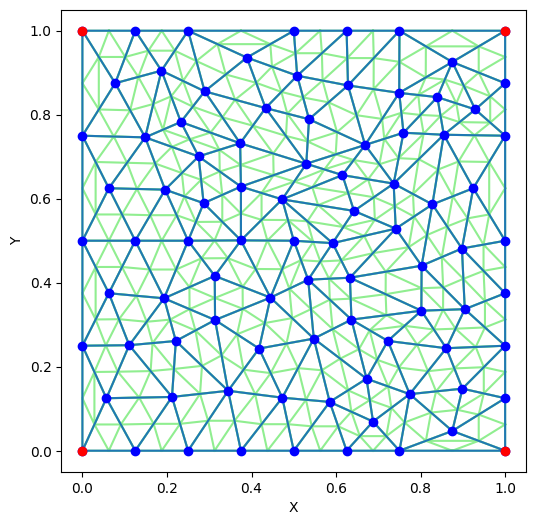

mesh info : 
  number of elements =  150
  H_max =  0.25
  H_min =  0.0895721626833764
  refinement ratio =  0.1791443253667523
submesh info : 
  number of elements =  4
  h_min =  0.04478608134168807


In [3]:
domain = [(0,0), (1,0), (1,1), (0,1)]
mesh=Mesh(domain,0.01,3)
mesh.plot_sub_mesh()
mesh.print_info()

# x, w = mesh.GLQ()
# x, y = np.array(x[:, 0]),np.array(x[:, 1])

# x = np.arange(0, 1, 0.01)

# v = pb.v(x, 0, 1)
# print(v[1])
# plt.plot(x, v)

# r = 1
# powers = []
# for i in range(r+1):
#     for j in range(r+1):
#         if i + j <= r:
#             powers.append((j,i))
# print(powers)

# tot = 0
# for a in powers:
#     tot += x**a[0] * 0**a[1]
#     print(tot)
# print(tot)


In [4]:

#degree used for test functions on small triangles 
r_tests = 5
#degree used interpolation on big triangles 
r_interolation =3



N_elements = [3, 5]
params = {'scheme': 'VPINNs',
            'NN_struct': [2] + [5] * 3 + [1],
            'var_form': 0,

            'n_elements': mesh._get_number_elements(),
            'n_sub_elements':mesh.meshed_elements[0]._get_number_elements(),

            'n_test': r_tests,
            'n_inter': r_interolation,

            'n_quad': 15,
            'n_bound': 80, #
            'n_residual': 100, #
            'domain': ((-1, -1), (1, 1)),
            'Opt_Niter': 10000 + 1,
            'delta_test': 0.01}

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (0, 3), (1, 3), (2, 3), (0, 4), (1, 4), (0, 5)]

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (0, 2), (1, 2), (2, 2), (0, 3), (1, 3), (0, 4)]
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (0, 2), (1, 2), (2, 2), (0, 3), (1, 3), (0, 4)]

[(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
[(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]
degree =  5  , local dof =  21
[[0 0]
 [1/5 0]
 [2/5 0]
 [3/5 0]
 [4/5 0]
 [1 0]
 [0 1/5]
 [1/5 1/5]
 [2/5 1/5]
 [3/5 1/5]
 [4/5 1/5]
 [0 2/5]
 [1/5 2/5]
 [2/5 2/5]
 [3/5 2/5]
 [0 3/5]
 [1/5 3/5]
 [2/5 3/5]
 [0 4/5]
 [1/5 4/5]
 [0 1]]


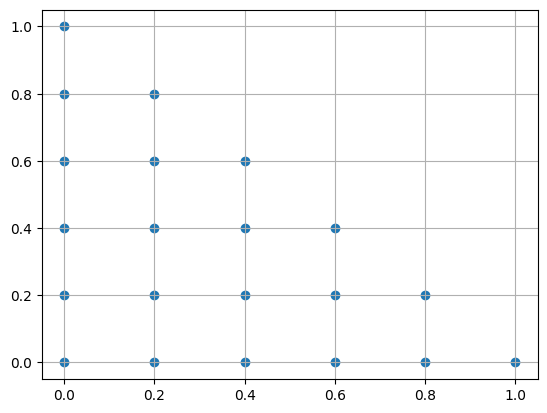

[(0, 0), (1, 0), (2, 0), (3, 0), (0, 1), (1, 1), (2, 1), (0, 2), (1, 2), (0, 3)]

[(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (0, 2)]
[(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (0, 2)]

[(0, 0), (1, 0), (0, 1)]
[(0, 0), (1, 0), (0, 1)]
degree =  3  , local dof =  10
[[0 0]
 [1/3 0]
 [2/3 0]
 [1 0]
 [0 1/3]
 [1/3 1/3]
 [2/3 1/3]
 [0 2/3]
 [1/3 2/3]
 [0 1]]


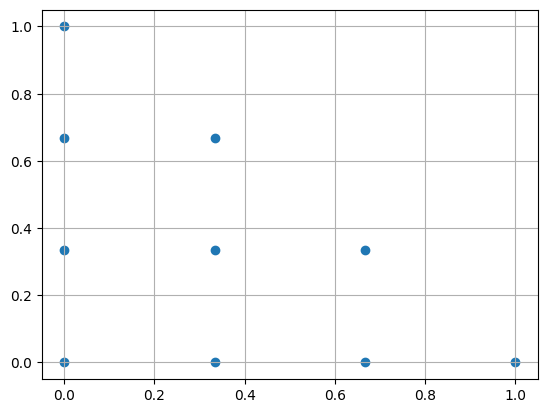

[[-0.00086866 -0.00197142 -0.00178808 -0.00202876 -0.00169705 -0.00084726
  -0.00193562 -0.01580477 -0.00170465 -0.01537168 -0.00168715 -0.00219097
  -0.00223663 -0.0020681  -0.00226425 -0.0018954  -0.01630868 -0.00172902
  -0.00225273 -0.00227886 -0.00088519]
 [-0.00085477 -0.0016975  -0.0021348  -0.00178994 -0.00209619 -0.00088798
  -0.00169192 -0.01555451 -0.00184363 -0.01618254 -0.00204739 -0.00225428
  -0.00202554 -0.00222634 -0.0021411  -0.0017592  -0.01644177 -0.00198945
  -0.00225363 -0.00221053 -0.00089676]
 [-0.00080119 -0.00177566 -0.00164638 -0.00185165 -0.00154079 -0.00078245
  -0.00173199 -0.01455735 -0.00150294 -0.01418708 -0.0015203  -0.00210898
  -0.00210202 -0.00196655 -0.00217313 -0.00169425 -0.01527314 -0.00155403
  -0.00218315 -0.00220659 -0.00082731]
 [-0.00094129 -0.00215202 -0.00205268 -0.00216915 -0.00201525 -0.000929
  -0.00214518 -0.01713651 -0.00203144 -0.01692135 -0.00202535 -0.0022004
  -0.00225543 -0.00220483 -0.00224205 -0.00213064 -0.01723955 -0.0020562

In [5]:
model = VPINN(pb, params, mesh)

In [6]:
NN = tf.keras.Sequential()
NN.add(tf.keras.layers.InputLayer(2))
# NN.add(tf.keras.layers.Lambda(lambda x: 2. * (x + 1) / (2) - 1.))

for width in 3*[5]:
    NN.add(tf.keras.layers.Dense(width,
                                    activation='tanh',
                                    kernel_initializer='glorot_uniform',
                                    bias_initializer='glorot_uniform',dtype=tf.float64))
NN.add(tf.keras.layers.Dense(1, activation='linear',dtype=tf.float64,kernel_initializer='glorot_uniform',
                                    bias_initializer='glorot_uniform'))

model.set_NN(NN = NN, LR = 0.002)
#OR
# model.initialise_NN(structure = [2,20,20,20,20,1], LR = 0.001)

In [7]:
print(len(model.F_total))

150


In [8]:
model.loss_big_triangle(0)

<tf.Tensor: shape=(), dtype=float64, numpy=0.0001535161714151416>

In [11]:
model.loss_total()

<tf.Tensor: shape=(), dtype=float64, numpy=0.05744288014304564>

In [12]:
#model.plot_prediction(False)
loss_his = model.train(params['Opt_Niter'])

Iteration: 0 loss: 0.057443 time: 8.146398782730103
Iteration: 1 loss: 0.057407 time: 7.984477996826172
Iteration: 2 loss: 0.057370 time: 7.970398187637329
Iteration: 3 loss: 0.057334 time: 8.016133546829224
Iteration: 4 loss: 0.057297 time: 8.02509617805481
Iteration: 5 loss: 0.057259 time: 7.93617844581604
Iteration: 6 loss: 0.057221 time: 8.470340490341187
Iteration: 7 loss: 0.057183 time: 8.649721384048462
Iteration: 8 loss: 0.057144 time: 8.87147331237793
Iteration: 9 loss: 0.057105 time: 8.3305025100708
Iteration: 10 loss: 0.057065 time: 8.705148458480835
Iteration: 11 loss: 0.057024 time: 8.55735158920288
Iteration: 12 loss: 0.056982 time: 8.340683460235596
Iteration: 13 loss: 0.056940 time: 8.342881679534912
Iteration: 14 loss: 0.056896 time: 8.93551516532898
Iteration: 15 loss: 0.056851 time: 8.197021961212158
Iteration: 16 loss: 0.056805 time: 8.279763221740723


KeyboardInterrupt: 

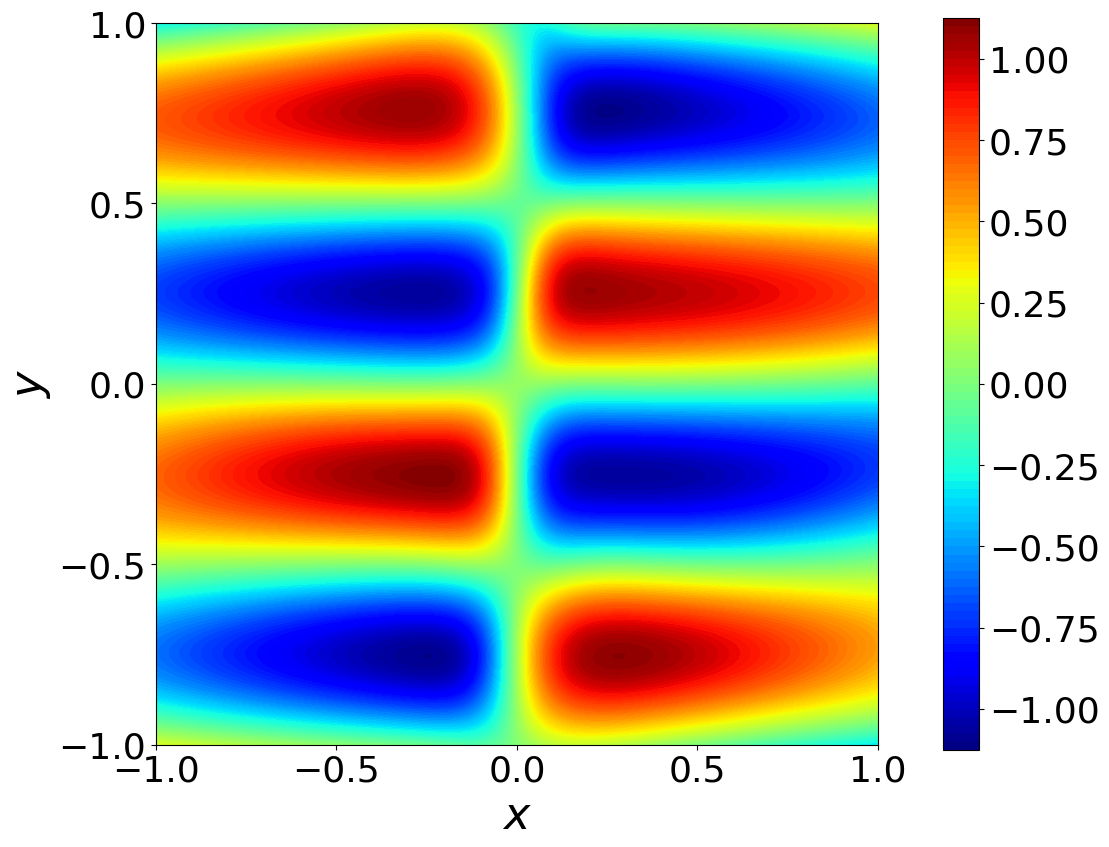

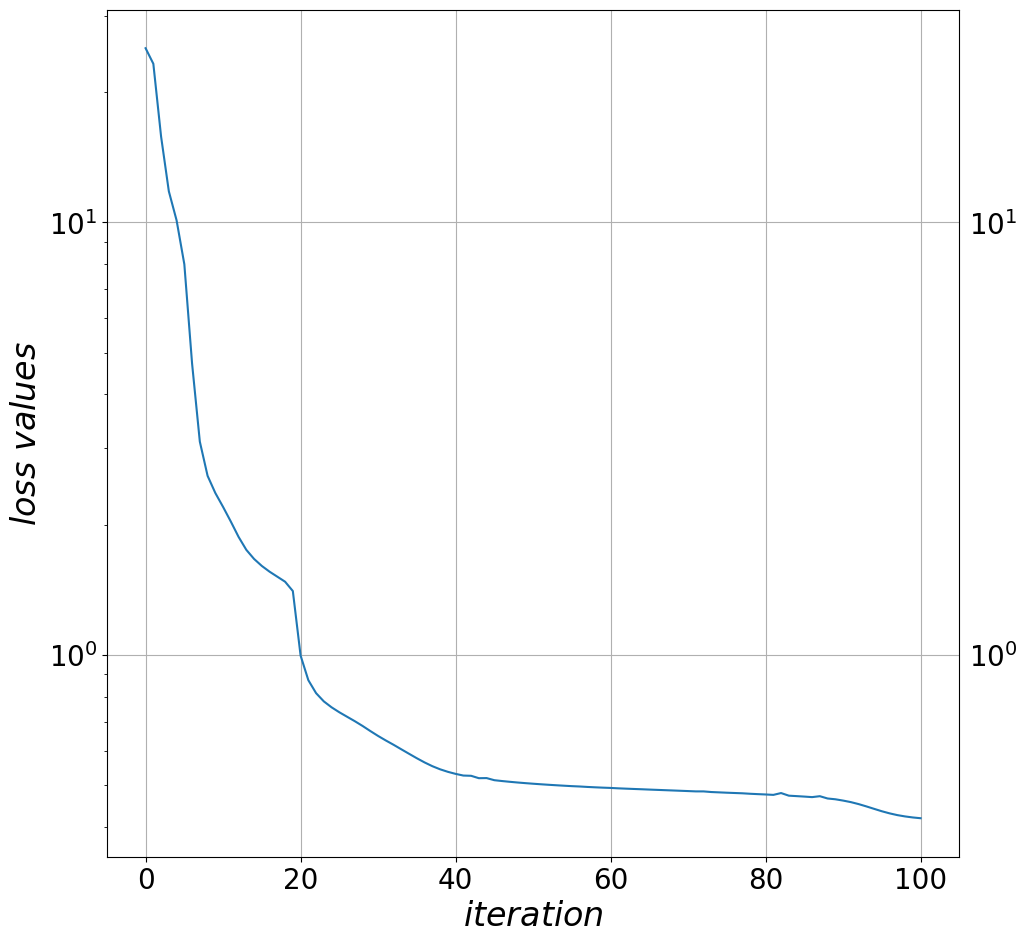

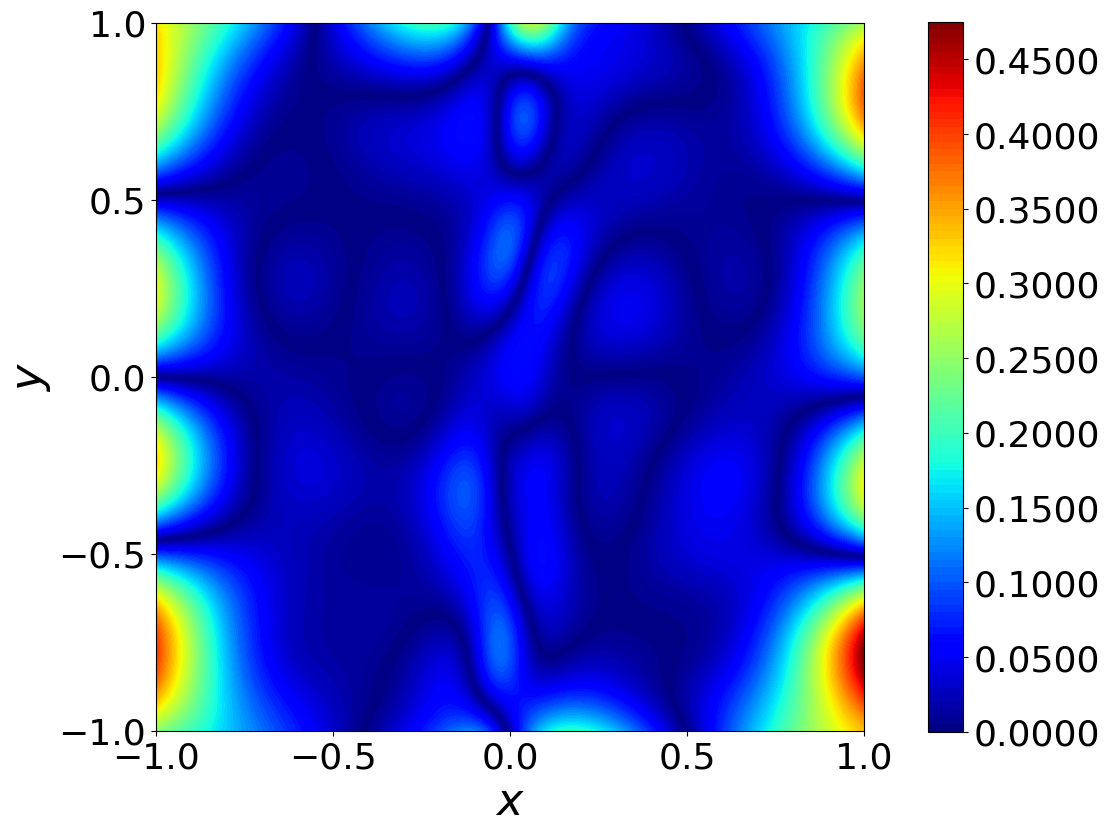

In [ ]:
model.plot_prediction(False)
model.plot_loss_history(loss_his, False)
model.plot_pointwise_error(False)